NVIDIA GeForce RTX 3080
Memory Usage:
Allocated: 0.1 GB
Cached:    0.1 GB


C:\Users\Aria\AppData\Local\Temp\ipykernel_92028\3291622571.py:162: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


Files already downloaded and verified
47000
Files already downloaded and verified


Using cache found in C:\Users\Aria/.cache\torch\hub\pytorch_vision_v0.6.0


[1,  1000] loss: 2.871, Ça coûte 18.684
[1,  2000] loss: 1.951, Ça coûte 33.689
[1,  3000] loss: 1.772, Ça coûte 33.757
[1,  4000] loss: 1.685, Ça coûte 32.752
[1,  5000] loss: 1.627, Ça coûte 32.614
[2,  1000] loss: 1.497, Ça coûte 9.618
[2,  2000] loss: 1.461, Ça coûte 33.221
[2,  3000] loss: 1.455, Ça coûte 33.350
[2,  4000] loss: 1.421, Ça coûte 33.185
[2,  5000] loss: 1.349, Ça coûte 33.480
[3,  1000] loss: 1.254, Ça coûte 9.823
[3,  2000] loss: 1.272, Ça coûte 33.880
[3,  3000] loss: 1.251, Ça coûte 33.843
[3,  4000] loss: 1.215, Ça coûte 34.221
[3,  5000] loss: 1.228, Ça coûte 34.503
[4,  1000] loss: 1.134, Ça coûte 9.899
[4,  2000] loss: 1.151, Ça coûte 34.526
[4,  3000] loss: 1.113, Ça coûte 34.462
[4,  4000] loss: 1.142, Ça coûte 34.060
[4,  5000] loss: 1.100, Ça coûte 34.790
[5,  1000] loss: 1.078, Ça coûte 10.013
[5,  2000] loss: 1.057, Ça coûte 34.481
[5,  3000] loss: 1.047, Ça coûte 34.595
[5,  4000] loss: 1.041, Ça coûte 34.456
[5,  5000] loss: 1.028, Ça coûte 34.769
[6,

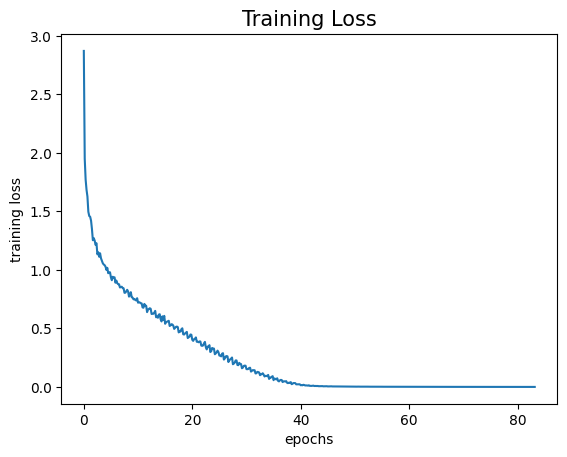

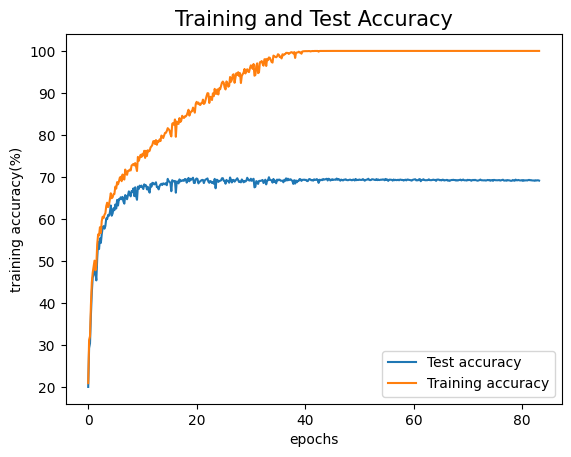

In [ ]:
"""
Batch size: 16
"""
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt
from torch.utils.data import Subset

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_some_pictures(j ):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(j)))


def random_test():
    dataiter = iter(testloader)
    images, labels = dataiter.next()

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    net = Net()
    net.load_state_dict(torch.load(PATH))
    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))

def train(net, noe, filepath_trainloss, filepath_testacc, filepath_trainacc, initial_lr,  batchsize, device):
    net.train()
    doc = open(filepath_trainloss+'.txt', "w")
    doc2 = open(filepath_testacc+'.txt', "w")
    doc3 = open(filepath_trainacc+'.txt', "w")
    check_interval=1000
    batch_number = int(6000*8/(batchsize*check_interval))
    #print(batch_number)
    training_loss_vec = [] #np.zeros(noe*check_interval)
    train_acc_vec = [] #np.zeros(noe*check_interval)
    test_acc_vec = [] #np.zeros(noe*check_interval)
    for epoch in range(noe):  # loop over the dataset multiple times
        time_begin  = time.time()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % check_interval == (check_interval-1):    # print every 2000 mini-batches
                time_end = time.time()
                time_elapsed = time_end - time_begin
                time_begin = time.time()
                print('[%d, %5d] loss: %.3f, Ça coûte %.3f' %
                      (epoch + 1, i + 1, running_loss / check_interval, time_elapsed))
                training_loss_vec.append(running_loss/check_interval)
                train_acc = train_accuracy(net)
                train_acc_vec.append(train_acc)
                test_acc = test_accuracy(net)
                test_acc_vec.append(test_acc)
                print(running_loss / check_interval, file=doc)
                print(test_acc, file=doc2)
                print(train_acc, file=doc3)
                running_loss = 0.0
        if epoch % 1 == 0:
            for p in optimizer.param_groups:
                p['lr'] = initial_lr/np.sqrt(1+epoch)
    doc.close()
    doc2.close()

    xvar = np.arange(len(training_loss_vec)) / batch_number
    #plt.subplot(122)
    plt.figure(1)
    plt.title("Training Loss", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training loss')
    plt.plot(xvar, np.array(training_loss_vec))
    plt.savefig(filepath_trainloss+'.png')

    #plt.subplot(122)
    plt.figure(2)
    plt.title("Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('test accuracy(%)')
    plt.plot(xvar, np.array(test_acc_vec), label="Test accuracy")
    plt.legend()
    plt.savefig(filepath_testacc + '.png')
    
    #plt.subplot(122)
    plt.figure(2)
    plt.title("Training and Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training accuracy(%)')
    plt.plot(xvar, np.array(train_acc_vec), label="Training accuracy")
    plt.legend()
    plt.savefig(filepath_trainacc + '.png')

def train_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def test_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

batchsize=8
# data sets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

#gotta take one of the classes from the cifar10 dataset and reduce it
trainarray = np.array(trainset.targets)

#separate the frogs
frog_class = np.where(np.array(trainarray) == 6)[0][:2000]

#remove frogs from the original train set
non_frog_class = np.where(np.array(trainarray) != 6)[0]

#now combine them again
reducedset = Subset(trainset, np.concatenate((frog_class, non_frog_class)))

#now printing the total size to make suer we removed some frogs
print(len(reducedset))

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


trainloader = torch.utils.data.DataLoader(reducedset, batch_size=batchsize,
                                          shuffle=True, num_workers=1)

testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=1)

beta_1 = 0
beta_2 = 1

# resnet
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=False)
net.eval()

net = net.to(device)
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(beta_1, beta_2), eps=1e-08, weight_decay=0, amsgrad=False)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=beta_1, dampening=0, weight_decay=0, nesterov=False)
train(net, 100, "Exp1-training-loss-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-test-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-train-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), 0.001, batchsize, device)
print('Finished Training')
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


NVIDIA GeForce RTX 3080
Memory Usage:
Allocated: 0.2 GB
Cached:    0.2 GB


C:\Users\Aria\AppData\Local\Temp\ipykernel_92028\1702735491.py:161: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


Files already downloaded and verified
47000
Files already downloaded and verified


Using cache found in C:\Users\Aria/.cache\torch\hub\pytorch_vision_v0.6.0


[1,  1000] loss: 2.658, Ça coûte 10.805
[2,  1000] loss: 1.770, Ça coûte 10.582
[3,  1000] loss: 1.577, Ça coûte 10.564
[4,  1000] loss: 1.495, Ça coûte 10.532
[5,  1000] loss: 1.441, Ça coûte 10.639
[6,  1000] loss: 1.395, Ça coûte 10.596
[7,  1000] loss: 1.366, Ça coûte 10.640
[8,  1000] loss: 1.327, Ça coûte 10.637
[9,  1000] loss: 1.299, Ça coûte 10.558
[10,  1000] loss: 1.274, Ça coûte 10.576
[11,  1000] loss: 1.240, Ça coûte 10.566
[12,  1000] loss: 1.212, Ça coûte 10.573
[13,  1000] loss: 1.201, Ça coûte 10.647
[14,  1000] loss: 1.172, Ça coûte 10.372
[15,  1000] loss: 1.161, Ça coûte 10.602
[16,  1000] loss: 1.150, Ça coûte 10.565
[17,  1000] loss: 1.128, Ça coûte 10.544
[18,  1000] loss: 1.112, Ça coûte 10.414
[19,  1000] loss: 1.097, Ça coûte 10.628
[20,  1000] loss: 1.082, Ça coûte 10.566
[21,  1000] loss: 1.074, Ça coûte 10.583
[22,  1000] loss: 1.062, Ça coûte 10.365
[23,  1000] loss: 1.055, Ça coûte 10.538
[24,  1000] loss: 1.040, Ça coûte 10.621
[25,  1000] loss: 1.030, 

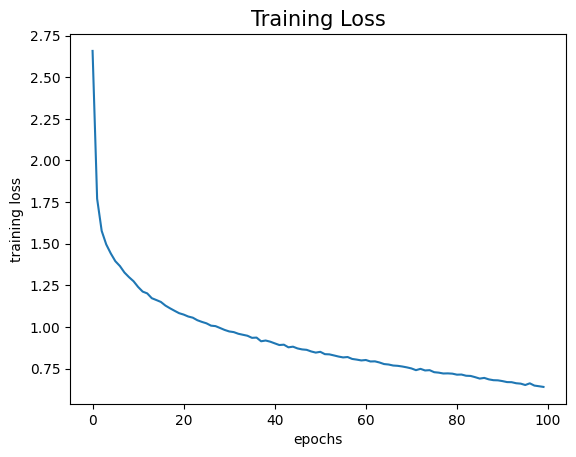

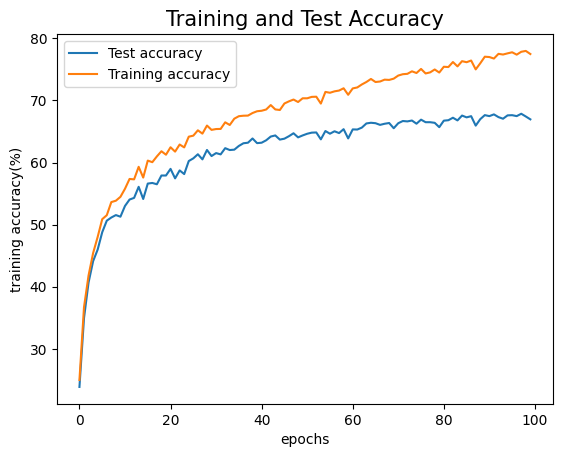

In [ ]:
"""
Batch size: 32
"""
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_some_pictures(j ):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(j)))


def random_test():
    dataiter = iter(testloader)
    images, labels = dataiter.next()

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    net = Net()
    net.load_state_dict(torch.load(PATH))
    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))

def train(net, noe, filepath_trainloss, filepath_testacc, filepath_trainacc, initial_lr,  batchsize, device):
    net.train()
    doc = open(filepath_trainloss+'.txt', "w")
    doc2 = open(filepath_testacc+'.txt', "w")
    doc3 = open(filepath_trainacc+'.txt', "w")
    check_interval=1000
    batch_number = int(6000*8/(batchsize*check_interval))
    #print(batch_number)
    training_loss_vec = [] #np.zeros(noe*check_interval)
    train_acc_vec = [] #np.zeros(noe*check_interval)
    test_acc_vec = [] #np.zeros(noe*check_interval)
    for epoch in range(noe):  # loop over the dataset multiple times
        time_begin  = time.time()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % check_interval == (check_interval-1):    # print every 2000 mini-batches
                time_end = time.time()
                time_elapsed = time_end - time_begin
                time_begin = time.time()
                print('[%d, %5d] loss: %.3f, Ça coûte %.3f' %
                      (epoch + 1, i + 1, running_loss / check_interval, time_elapsed))
                training_loss_vec.append(running_loss/check_interval)
                train_acc = train_accuracy(net)
                train_acc_vec.append(train_acc)
                test_acc = test_accuracy(net)
                test_acc_vec.append(test_acc)
                print(running_loss / check_interval, file=doc)
                print(test_acc, file=doc2)
                print(train_acc, file=doc3)
                running_loss = 0.0
        if epoch % 1 == 0:
            for p in optimizer.param_groups:
                p['lr'] = initial_lr/np.sqrt(1+epoch)
    doc.close()
    doc2.close()

    xvar = np.arange(len(training_loss_vec)) / batch_number
    #plt.subplot(122)
    plt.figure(1)
    plt.title("Training Loss", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training loss')
    plt.plot(xvar, np.array(training_loss_vec))
    plt.savefig(filepath_trainloss+'.png')

    #plt.subplot(122)
    plt.figure(2)
    plt.title("Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('test accuracy(%)')
    plt.plot(xvar, np.array(test_acc_vec), label="Test accuracy")
    plt.legend()
    plt.savefig(filepath_testacc + '.png')
    
    #plt.subplot(122)
    plt.figure(2)
    plt.title("Training and Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training accuracy(%)')
    plt.plot(xvar, np.array(train_acc_vec), label="Training accuracy")
    plt.legend()
    plt.savefig(filepath_trainacc + '.png')

def train_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def test_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

batchsize=32
# data sets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

#gotta take one of the classes from the cifar10 dataset and reduce it
trainarray = np.array(trainset.targets)

#separate the frogs
frog_class = np.where(np.array(trainarray) == 6)[0][:2000]

#remove frogs from the original train set
non_frog_class = np.where(np.array(trainarray) != 6)[0]

#now combine them again
reducedset = Subset(trainset, np.concatenate((frog_class, non_frog_class)))

#now printing the total size to make suer we removed some frogs
print(len(reducedset))

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


trainloader = torch.utils.data.DataLoader(reducedset, batch_size=batchsize,
                                          shuffle=True, num_workers=1)

testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=1)

beta_1 = 0
beta_2 = 1

# resnet
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=False)
net.eval()

net = net.to(device)
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(beta_1, beta_2), eps=1e-08, weight_decay=0, amsgrad=False)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=beta_1, dampening=0, weight_decay=0, nesterov=False)
train(net, 100, "Exp1-training-loss-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-test-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-train-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), 0.001, batchsize, device)
print('Finished Training')
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


NVIDIA GeForce RTX 3080
Memory Usage:
Allocated: 0.2 GB
Cached:    0.3 GB


C:\Users\Aria\AppData\Local\Temp\ipykernel_92028\2308664146.py:161: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


Files already downloaded and verified
47000
Files already downloaded and verified


Using cache found in C:\Users\Aria/.cache\torch\hub\pytorch_vision_v0.6.0


[1,   100] loss: 5.708, Ça coûte 6.848
[2,   100] loss: 2.205, Ça coûte 6.820
[3,   100] loss: 2.096, Ça coûte 6.791
[4,   100] loss: 2.041, Ça coûte 6.864
[5,   100] loss: 2.003, Ça coûte 6.620
[6,   100] loss: 1.968, Ça coûte 6.848
[7,   100] loss: 1.938, Ça coûte 6.782
[8,   100] loss: 1.908, Ça coûte 6.811
[9,   100] loss: 1.883, Ça coûte 6.813
[10,   100] loss: 1.854, Ça coûte 6.786
[11,   100] loss: 1.837, Ça coûte 6.867
[12,   100] loss: 1.820, Ça coûte 6.821
[13,   100] loss: 1.803, Ça coûte 6.788
[14,   100] loss: 1.788, Ça coûte 6.803
[15,   100] loss: 1.770, Ça coûte 6.840
[16,   100] loss: 1.753, Ça coûte 6.885
[17,   100] loss: 1.742, Ça coûte 6.805
[18,   100] loss: 1.732, Ça coûte 6.843
[19,   100] loss: 1.719, Ça coûte 6.792
[20,   100] loss: 1.704, Ça coûte 6.873
[21,   100] loss: 1.695, Ça coûte 6.834
[22,   100] loss: 1.678, Ça coûte 6.776
[23,   100] loss: 1.671, Ça coûte 6.949
[24,   100] loss: 1.658, Ça coûte 6.826
[25,   100] loss: 1.653, Ça coûte 6.885
[26,   10

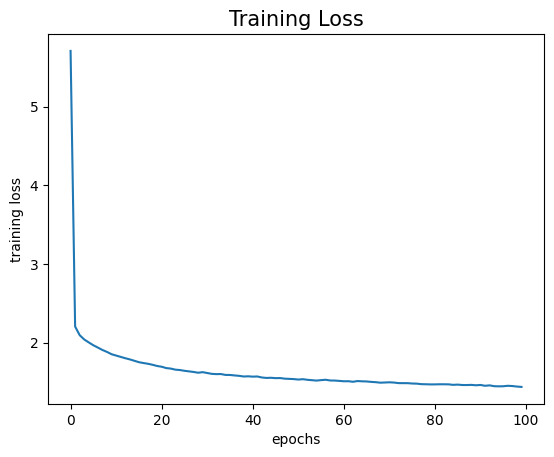

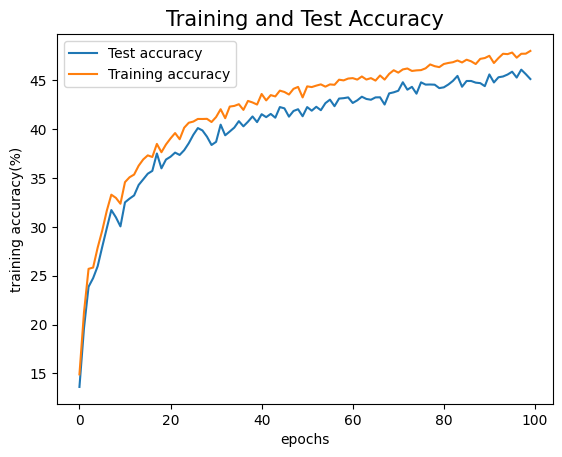

In [ ]:
"""
Batch size: 256
"""
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_some_pictures(j ):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(j)))


def random_test():
    dataiter = iter(testloader)
    images, labels = dataiter.next()

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    net = Net()
    net.load_state_dict(torch.load(PATH))
    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))

def train(net, noe, filepath_trainloss, filepath_testacc, filepath_trainacc, initial_lr,  batchsize, device):
    net.train()
    doc = open(filepath_trainloss+'.txt', "w")
    doc2 = open(filepath_testacc+'.txt', "w")
    doc3 = open(filepath_trainacc+'.txt', "w")
    check_interval=100
    batch_number = int(6000*8/(batchsize*check_interval))
    #print(batch_number)
    training_loss_vec = [] #np.zeros(noe*check_interval)
    train_acc_vec = [] #np.zeros(noe*check_interval)
    test_acc_vec = [] #np.zeros(noe*check_interval)
    for epoch in range(noe):  # loop over the dataset multiple times
        time_begin  = time.time()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % check_interval == (check_interval-1):    # print every 2000 mini-batches
                time_end = time.time()
                time_elapsed = time_end - time_begin
                time_begin = time.time()
                print('[%d, %5d] loss: %.3f, Ça coûte %.3f' %
                      (epoch + 1, i + 1, running_loss / check_interval, time_elapsed))
                training_loss_vec.append(running_loss/check_interval)
                train_acc = train_accuracy(net)
                train_acc_vec.append(train_acc)
                test_acc = test_accuracy(net)
                test_acc_vec.append(test_acc)
                print(running_loss / check_interval, file=doc)
                print(test_acc, file=doc2)
                print(train_acc, file=doc3)
                running_loss = 0.0
        if epoch % 1 == 0:
            for p in optimizer.param_groups:
                p['lr'] = initial_lr/np.sqrt(1+epoch)
    doc.close()
    doc2.close()

    xvar = np.arange(len(training_loss_vec)) / batch_number
    #plt.subplot(122)
    plt.figure(1)
    plt.title("Training Loss", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training loss')
    plt.plot(xvar, np.array(training_loss_vec))
    plt.savefig(filepath_trainloss+'.png')

    #plt.subplot(122)
    plt.figure(2)
    plt.title("Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('test accuracy(%)')
    plt.plot(xvar, np.array(test_acc_vec), label="Test accuracy")
    plt.legend()
    plt.savefig(filepath_testacc + '.png')
    
    #plt.subplot(122)
    plt.figure(2)
    plt.title("Training and Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training accuracy(%)')
    plt.plot(xvar, np.array(train_acc_vec), label="Training accuracy")
    plt.legend()
    plt.savefig(filepath_trainacc + '.png')

def train_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def test_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

batchsize=256
# data sets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

#gotta take one of the classes from the cifar10 dataset and reduce it
trainarray = np.array(trainset.targets)

#separate the frogs
frog_class = np.where(np.array(trainarray) == 6)[0][:2000]

#remove frogs from the original train set
non_frog_class = np.where(np.array(trainarray) != 6)[0]

#now combine them again
reducedset = Subset(trainset, np.concatenate((frog_class, non_frog_class)))

#now printing the total size to make suer we removed some frogs
print(len(reducedset))

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


trainloader = torch.utils.data.DataLoader(reducedset, batch_size=batchsize,
                                          shuffle=True, num_workers=1)

testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=1)

beta_1 = 0
beta_2 = 1

# resnet
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=False)
net.eval()

net = net.to(device)
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(beta_1, beta_2), eps=1e-08, weight_decay=0, amsgrad=False)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=beta_1, dampening=0, weight_decay=0, nesterov=False)
train(net, 100, "Exp1-training-loss-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-test-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-train-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), 0.001, batchsize, device)
print('Finished Training')
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


NVIDIA GeForce RTX 3080
Memory Usage:
Allocated: 0.2 GB
Cached:    0.4 GB


C:\Users\Aria\AppData\Local\Temp\ipykernel_92028\2980608451.py:161: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


Files already downloaded and verified
47000
Files already downloaded and verified


Using cache found in C:\Users\Aria/.cache\torch\hub\pytorch_vision_v0.6.0


[1,    50] loss: 6.696, Ça coûte 6.814
[2,    50] loss: 2.285, Ça coûte 6.800
[3,    50] loss: 2.178, Ça coûte 6.718
[4,    50] loss: 2.126, Ça coûte 6.762
[5,    50] loss: 2.091, Ça coûte 6.701
[6,    50] loss: 2.063, Ça coûte 6.757
[7,    50] loss: 2.040, Ça coûte 6.758
[8,    50] loss: 2.024, Ça coûte 6.784
[9,    50] loss: 2.010, Ça coûte 6.767
[10,    50] loss: 1.997, Ça coûte 6.952
[11,    50] loss: 1.976, Ça coûte 6.800
[12,    50] loss: 1.964, Ça coûte 6.802
[13,    50] loss: 1.954, Ça coûte 6.769
[14,    50] loss: 1.945, Ça coûte 6.780
[15,    50] loss: 1.935, Ça coûte 7.004
[16,    50] loss: 1.917, Ça coûte 6.986
[17,    50] loss: 1.912, Ça coûte 6.955
[18,    50] loss: 1.902, Ça coûte 7.147
[19,    50] loss: 1.896, Ça coûte 7.003
[20,    50] loss: 1.880, Ça coûte 7.048
[21,    50] loss: 1.871, Ça coûte 6.963
[22,    50] loss: 1.866, Ça coûte 6.969
[23,    50] loss: 1.862, Ça coûte 6.937
[24,    50] loss: 1.850, Ça coûte 6.967
[25,    50] loss: 1.851, Ça coûte 7.096
[26,    5

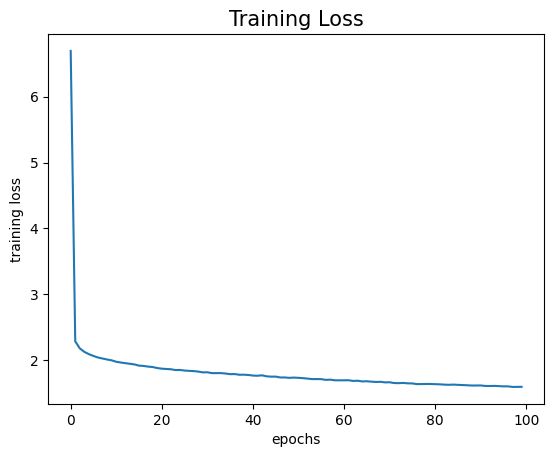

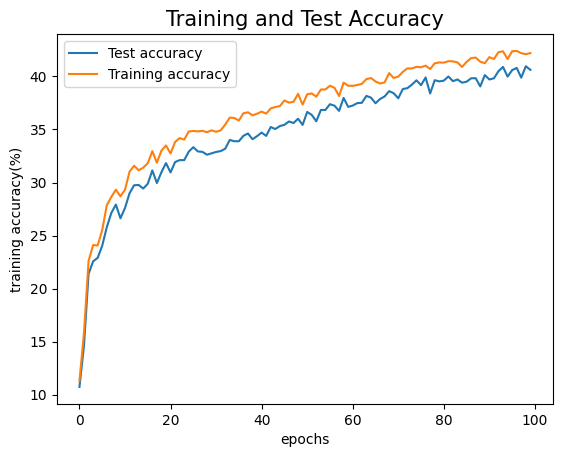

In [ ]:
"""
Batch size: 512
"""
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_some_pictures(j ):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(j)))


def random_test():
    dataiter = iter(testloader)
    images, labels = dataiter.next()

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    net = Net()
    net.load_state_dict(torch.load(PATH))
    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))

def train(net, noe, filepath_trainloss, filepath_testacc, filepath_trainacc, initial_lr,  batchsize, device):
    net.train()
    doc = open(filepath_trainloss+'.txt', "w")
    doc2 = open(filepath_testacc+'.txt', "w")
    doc3 = open(filepath_trainacc+'.txt', "w")
    check_interval=50
    batch_number = int(6000*8/(batchsize*check_interval))
    #print(batch_number)
    training_loss_vec = [] #np.zeros(noe*check_interval)
    train_acc_vec = [] #np.zeros(noe*check_interval)
    test_acc_vec = [] #np.zeros(noe*check_interval)
    for epoch in range(noe):  # loop over the dataset multiple times
        time_begin  = time.time()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % check_interval == (check_interval-1):    # print every 2000 mini-batches
                time_end = time.time()
                time_elapsed = time_end - time_begin
                time_begin = time.time()
                print('[%d, %5d] loss: %.3f, Ça coûte %.3f' %
                      (epoch + 1, i + 1, running_loss / check_interval, time_elapsed))
                training_loss_vec.append(running_loss/check_interval)
                train_acc = train_accuracy(net)
                train_acc_vec.append(train_acc)
                test_acc = test_accuracy(net)
                test_acc_vec.append(test_acc)
                print(running_loss / check_interval, file=doc)
                print(test_acc, file=doc2)
                print(train_acc, file=doc3)
                running_loss = 0.0
        if epoch % 1 == 0:
            for p in optimizer.param_groups:
                p['lr'] = initial_lr/np.sqrt(1+epoch)
    doc.close()
    doc2.close()

    xvar = np.arange(len(training_loss_vec)) / batch_number
    #plt.subplot(122)
    plt.figure(1)
    plt.title("Training Loss", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training loss')
    plt.plot(xvar, np.array(training_loss_vec))
    plt.savefig(filepath_trainloss+'.png')

    #plt.subplot(122)
    plt.figure(2)
    plt.title("Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('test accuracy(%)')
    plt.plot(xvar, np.array(test_acc_vec), label="Test accuracy")
    plt.legend()
    plt.savefig(filepath_testacc + '.png')
    
    #plt.subplot(122)
    plt.figure(2)
    plt.title("Training and Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training accuracy(%)')
    plt.plot(xvar, np.array(train_acc_vec), label="Training accuracy")
    plt.legend()
    plt.savefig(filepath_trainacc + '.png')

def train_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def test_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

batchsize=512
# data sets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

#gotta take one of the classes from the cifar10 dataset and reduce it
trainarray = np.array(trainset.targets)

#separate the frogs
frog_class = np.where(np.array(trainarray) == 6)[0][:2000]

#remove frogs from the original train set
non_frog_class = np.where(np.array(trainarray) != 6)[0]

#now combine them again
reducedset = Subset(trainset, np.concatenate((frog_class, non_frog_class)))

#now printing the total size to make suer we removed some frogs
print(len(reducedset))

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


trainloader = torch.utils.data.DataLoader(reducedset, batch_size=batchsize,
                                          shuffle=True, num_workers=1)

testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=1)

beta_1 = 0
beta_2 = 1

# resnet
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=False)
net.eval()

net = net.to(device)
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(beta_1, beta_2), eps=1e-08, weight_decay=0, amsgrad=False)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=beta_1, dampening=0, weight_decay=0, nesterov=False)
train(net, 100, "Exp1-training-loss-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-test-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-train-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), 0.001, batchsize, device)
print('Finished Training')
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
